In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [40]:
ticker = 'SPY'
data = yf.download(ticker, start='2022-01-01', end='2025-03-15')['Close']['SPY']

[*********************100%***********************]  1 of 1 completed


In [41]:
daily_returns = data.pct_change().dropna()
sigma = daily_returns.std() * np.sqrt(252)

In [42]:
daily_returns.tail()

Date
2025-03-10   -0.026636
2025-03-11   -0.008313
2025-03-12    0.005307
2025-03-13   -0.013331
2025-03-14    0.020656
Name: SPY, dtype: float64

In [44]:
## PARAMETROS

#Precio Spot
S0 = data.iloc[-1]
sigma = daily_returns.std() * np.sqrt(252)

# Tasa libre de riesgo
r = 0.10

# Días al vencimiento
T = 252
dt = 1 / T

num_simulations = 10000

# Choques aleatorios para rendimientos del subyacente
Z = np.random.normal(0, 1, (num_simulations, T ) )

# Matriz de precios simulados del subyacente
# N filas X Pasos + 1 (Por S0)
price_matrix = np.zeros( (num_simulations, T + 1 ) )


In [45]:
barrier_price = S0*1.2


for i in range (num_simulations):

    #Inicio de la trayectoria simulada
    price_path = [S0]
    barrier_breached = False

    for dia in range(1, T+1):
        St = price_path[-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z[i, dia - 1])
        price_path.append(St)

        # Para este ejemplo, si ST es mayor a la barrera:
        if St > barrier_price:
            barrier_breached = True
            break

    if  barrier_breached:
        price_matrix[i, :] = 0
    else:
        price_matrix[i, :] = price_path
    

In [46]:
price_matrix

array([[561.12200928, 560.54104688, 555.1247794 , ..., 525.01078845,
        524.87816375, 527.60601413],
       [561.12200928, 568.07026733, 566.30282795, ..., 556.81279909,
        550.8465173 , 552.2485794 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [561.12200928, 555.86932056, 559.92654127, ..., 565.69968087,
        566.09727527, 571.05511809],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [47]:
K= 650

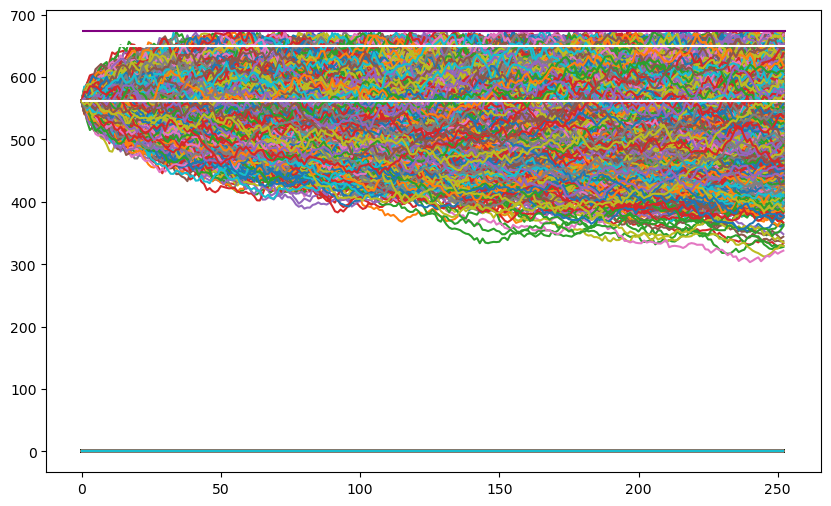

In [48]:
plt.figure(figsize = (10,6))
plt.plot( np.arange(T+1), price_matrix.T)
plt.hlines(y = S0, xmin = 0, xmax = 253,
           colors = 'white',
           label = 'vline_multiple - full height')
plt.hlines(y = barrier_price, xmin = 0, xmax = 253,
           colors = 'purple',
           label = 'vline_multiple - full height')

plt.hlines(y = K, xmin = 0, xmax = 253,
           colors = 'white',
           label = 'vline_multiple - full height')

In [50]:
np.where(price_matrix[:-1] == 0, 700, price_matrix[:-1])

array([[561.12200928, 560.54104688, 555.1247794 , ..., 525.01078845,
        524.87816375, 527.60601413],
       [561.12200928, 568.07026733, 566.30282795, ..., 556.81279909,
        550.8465173 , 552.2485794 ],
       [700.        , 700.        , 700.        , ..., 700.        ,
        700.        , 700.        ],
       ...,
       [700.        , 700.        , 700.        , ..., 700.        ,
        700.        , 700.        ],
       [700.        , 700.        , 700.        , ..., 700.        ,
        700.        , 700.        ],
       [561.12200928, 555.86932056, 559.92654127, ..., 565.69968087,
        566.09727527, 571.05511809]])

In [51]:
price_matrix[:-1] = np.where(price_matrix[:-1] == 0, 700, price_matrix[:-1])
put_payoffs = np.maximum(  K - price_matrix[:-1], 0)
put_payoffs

array([[ 88.87799072,  89.45895312,  94.8752206 , ..., 124.98921155,
        125.12183625, 122.39398587],
       [ 88.87799072,  81.92973267,  83.69717205, ...,  93.18720091,
         99.1534827 ,  97.7514206 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 88.87799072,  94.13067944,  90.07345873, ...,  84.30031913,
         83.90272473,  78.94488191]])